<a href="https://colab.research.google.com/github/hemsush/MLprojects/blob/main/Amazon_UK_SalesDataset_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Reference -https://www.kaggle.com/datasets/revanthkrishnakomali/amazon-uk-salesforecasting-20192021?resource=download

In [1]:

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/test/amazon_sales_dataset.csv')

Mounted at /content/drive


# DATA EXPLORATION

In [4]:
df.head()

,Date,Store,Dept,Unnamed: 3,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
0,05/02/2019,1,1,05/02/2019,24924.50,A,151315,42.31,2.572,211.096358,...,0,2019,2,5,57592.12,14537.37,22513.322940,18535.48,9854.349032,0.0
1,05/02/2019,9,97,05/02/2019,668.48,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2,05/02/2019,9,85,05/02/2019,693.87,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
3,05/02/2019,8,80,05/02/2019,8654.60,A,155078,34.14,2.572,214.471451,...,0,2019,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
4,05/02/2019,9,55,05/02/2019,11123.56,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [5]:
df.shape

(374247, 21)

In [6]:
df.info

<bound method DataFrame.info of               Date  Store  Dept  Unnamed: 3  Weekly_Sales Type    Size  \
0       05/02/2019      1     1  05/02/2019      24924.50    A  151315   
1       05/02/2019      9    97  05/02/2019        668.48    B  125833   
2       05/02/2019      9    85  05/02/2019        693.87    B  125833   
3       05/02/2019      8    80  05/02/2019       8654.60    A  155078   
4       05/02/2019      9    55  05/02/2019      11123.56    B  125833   
...            ...    ...   ...         ...           ...  ...     ...   
374242  26/10/2021      2    26  26/10/2021       9258.88    A  202307   
374243  26/10/2021     38    23  26/10/2021         53.12    C   39690   
374244  26/10/2021     27     6  26/10/2021       5339.65    A  204184   
374245  26/10/2021     36    40  26/10/2021      10216.27    A   39910   
374246  26/10/2021     45    98  26/10/2021       1076.80    B  118221   

        Temperature  Fuel_Price         CPI  ...  IsHoliday  Year  Month  \
0  

In [7]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
count,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000
mean,22.299345,43.421369,13058.690149,134650.701571,60.241022,3.354381,173.423324,7.695551,0.061211,2019.968702,6.437807,25.788471,30520.909403,8428.549075,13346.242316,12562.757282,3592.673175,4791.216015
std,12.919329,30.087812,15417.195280,60805.893266,18.112858,0.466553,38.918398,1.390530,0.239717,0.802722,3.180864,13.840661,42046.263020,11364.174300,15474.285934,15032.726407,5243.661887,8782.811084
min,1.000000,1.000000,0.000000,34875.000000,14.020000,2.472000,126.064000,3.879000,0.000000,2019.000000,1.000000,1.000000,0.020000,-4988.940000,-116.454545,-143.000000,0.000000,0.000000
25%,11.000000,18.000000,1979.800000,93188.000000,47.130000,2.891000,132.756800,6.858000,0.000000,2019.000000,4.000000,14.000000,5794.330000,675.000000,2308.411818,2017.000000,731.571412,0.000000
50%,22.000000,36.000000,7101.310000,128107.000000,62.490000,3.462000,188.797935,7.838000,0.000000,2020.000000,6.000000,26.000000,17294.460000,3847.950000,7534.953916,6856.100000,1880.958217,0.000000
75%,33.000000,72.000000,18252.355000,202307.000000,74.220000,3.738000,213.178695,8.512000,0.000000,2021.000000,9.000000,37.000000,41082.450000,11424.500000,18687.708250,17317.790000,4263.309723,6893.330000
max,45.000000,99.000000,72756.180000,219622.000000,100.140000,4.468000,227.232807,12.187000,1.000000,2021.000000,12.000000,52.000000,649770.180000,72028.740000,108598.364100,107690.800000,71265.927070,43413.900000


# Data Cleaning

In [9]:
#Checking for null values
df.isnull().sum()*100/df.shape[0]

Date              0.0
Store             0.0
Dept              0.0
Unnamed: 3        0.0
Weekly_Sales      0.0
Type              0.0
Size              0.0
Temperature       0.0
Fuel_Price        0.0
CPI               0.0
Unemployment      0.0
IsHoliday         0.0
Year              0.0
Month             0.0
Week              0.0
max               0.0
min               0.0
mean              0.0
median            0.0
std               0.0
Total_MarkDown    0.0
dtype: float64

In [23]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.isnull().sum()*100/df.shape[0]

Date              0.0
Store             0.0
Dept              0.0
Weekly_Sales      0.0
Type              0.0
Size              0.0
Temperature       0.0
Fuel_Price        0.0
CPI               0.0
Unemployment      0.0
IsHoliday         0.0
Year              0.0
Month             0.0
Week              0.0
max               0.0
min               0.0
mean              0.0
median            0.0
std               0.0
Total_MarkDown    0.0
dtype: float64

### Outlier Analysis

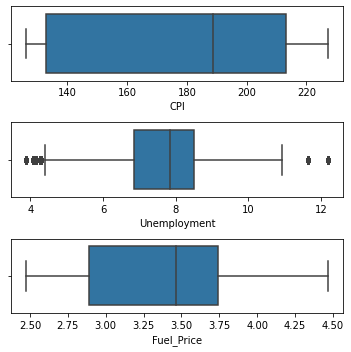

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['CPI'], ax = axs[0])
plt2 = sns.boxplot(df['Unemployment'], ax = axs[1])
plt3 = sns.boxplot(df['Fuel_Price'], ax = axs[2])
plt.tight_layout()

# EDA

# Univariate Analysis

### Sales (Target Variable)

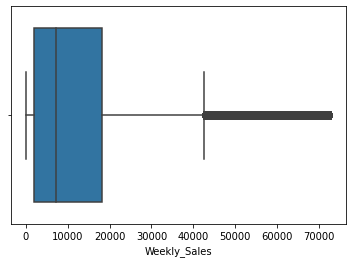

In [14]:
sns.boxplot(df['Weekly_Sales'])
plt.show()

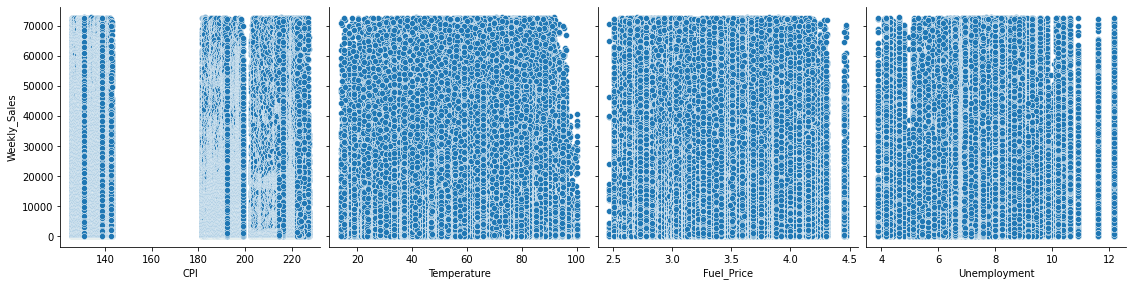

In [15]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['CPI', 'Temperature', 'Fuel_Price', 'Unemployment'], y_vars='Weekly_Sales', height=4, aspect=1, kind='scatter')
plt.show()

Correlation

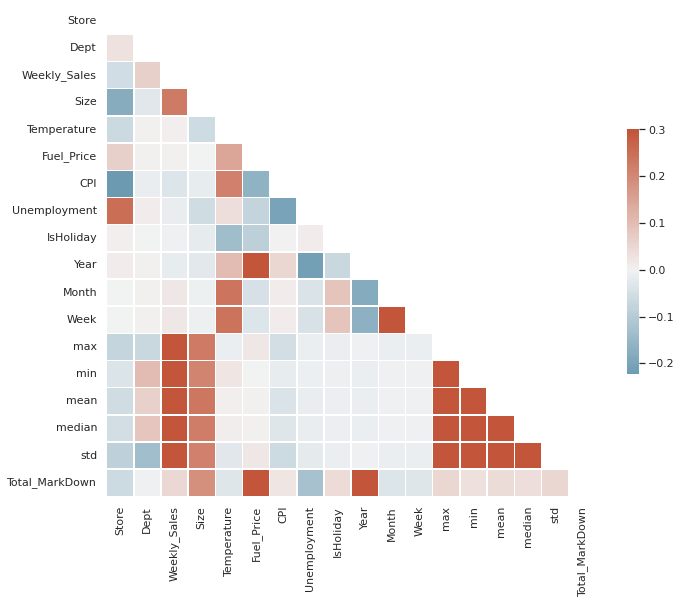

In [21]:
# Let's see the correlation between different variables.
sns.set_theme(style="white")
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From Heat map , we are taking temperature,CPI,Weekly sales,Size,fuel price , Unemployment,IsHoliday

Performing Simple Linear Regression
Equation of linear regression
y=c+m1x1+m2x2+...+mnxn

y is the response
c is the intercept
m1 is the coefficient for the first feature
mn is the coefficient for the nth feature


The m values are called the model coefficients or model parameters.

# Dropping columns

In [24]:
X=df.drop(['Date', 'Type','max','min','mean','median','std','Total_MarkDown'], axis=1)

In [25]:
X.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week
count,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000
mean,22.299345,43.421369,13058.690149,134650.701571,60.241022,3.354381,173.423324,7.695551,0.061211,2019.968702,6.437807,25.788471
std,12.919329,30.087812,15417.195280,60805.893266,18.112858,0.466553,38.918398,1.390530,0.239717,0.802722,3.180864,13.840661
min,1.000000,1.000000,0.000000,34875.000000,14.020000,2.472000,126.064000,3.879000,0.000000,2019.000000,1.000000,1.000000
25%,11.000000,18.000000,1979.800000,93188.000000,47.130000,2.891000,132.756800,6.858000,0.000000,2019.000000,4.000000,14.000000
50%,22.000000,36.000000,7101.310000,128107.000000,62.490000,3.462000,188.797935,7.838000,0.000000,2020.000000,6.000000,26.000000
75%,33.000000,72.000000,18252.355000,202307.000000,74.220000,3.738000,213.178695,8.512000,0.000000,2021.000000,9.000000,37.000000
max,45.000000,99.000000,72756.180000,219622.000000,100.140000,4.468000,227.232807,12.187000,1.000000,2021.000000,12.000000,52.000000


In [26]:
X=X.drop(['Weekly_Sales'], axis=1)

In [27]:
Y=df['Weekly_Sales']

In [29]:
Y.describe()


count    374247.000000
mean      13058.690149
std       15417.195280
min           0.000000
25%        1979.800000
50%        7101.310000
75%       18252.355000
max       72756.180000
Name: Weekly_Sales, dtype: float64

In [32]:
print(X.shape)


(374247, 11)


In [33]:
Y.shape

(374247,)

# Split data into train and test sets:

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=101)

# Linear regression Model

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [73]:

# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [74]:
# making predictions
predictions = model.predict(X_test)

# Model Evaluation

# MSE

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('mean_squared_error : ', mean_squared_error(y_test, predictions))

mean_squared_error :  223665294.14882672


# MAE

In [45]:
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_absolute_error :  11219.09314262067


# R2 score (Accuracy)

In [46]:
r2_score = model.score(X_test,y_test)
print(r2_score*100,'%')

5.707248791075892 %


# RMSE

In [48]:
rmse=np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)

14955.443629288524


# Actual vs Predicted

In [68]:
import matplotlib.pyplot as plt




In [76]:
df_train = pd.DataFrame(y_train, columns = ['sales'])
df_test = pd.DataFrame(y_test, columns = ['sales'])
df_train['sales']=df_train['sales'].astype(float)
df_test['sales']=df_test['sales'].astype(float)


In [77]:
 df_predict=pd.DataFrame(predictions, columns = ['sales'])
 df_predict['sales']=df_predict['sales'].astype(float)


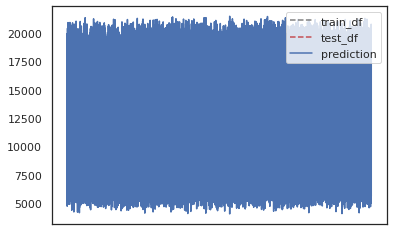

In [67]:
df_train['sales'].plot(style='--', color='gray', legend=True, label='train_df')
df_test['sales'].plot(style='--', color='r', legend=True, label='test_df')
df_predict['sales'].plot(color='b', legend=True, label='prediction')
